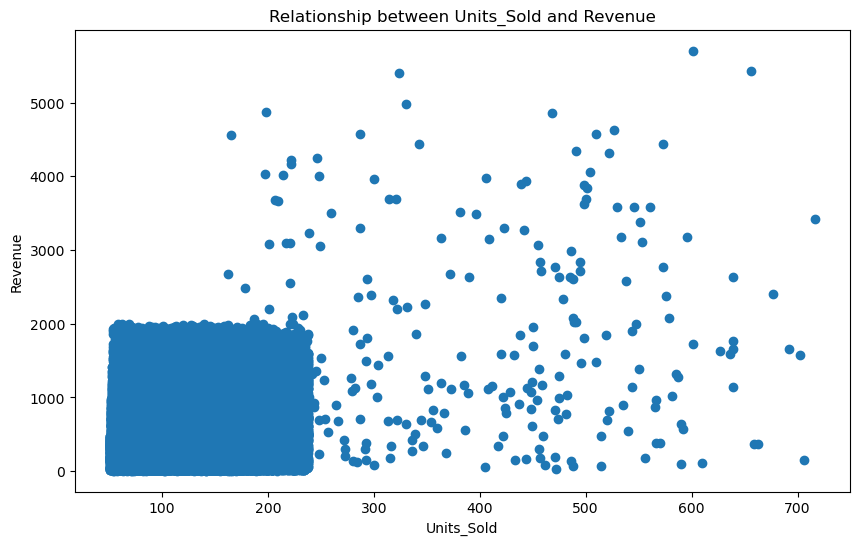

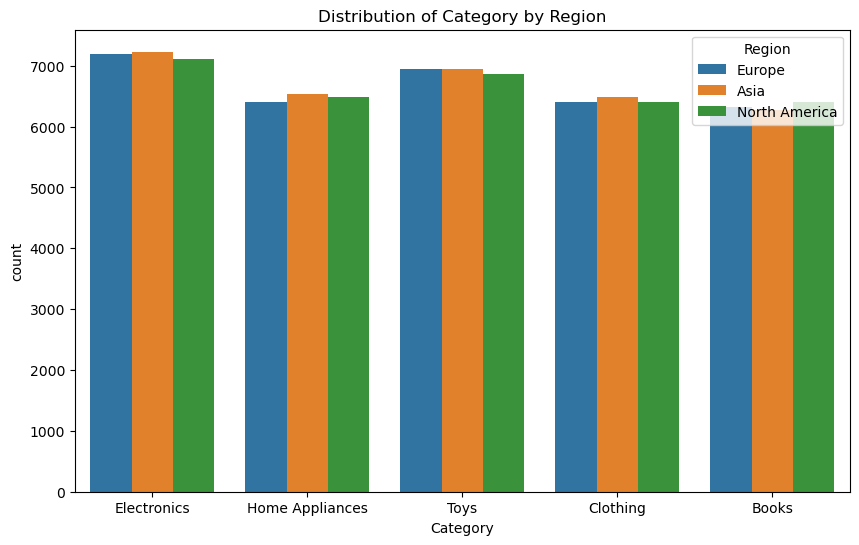

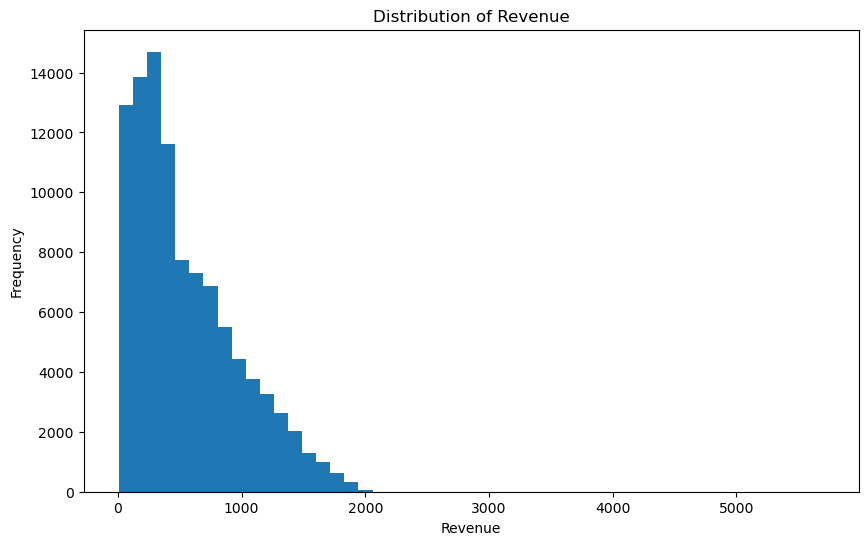

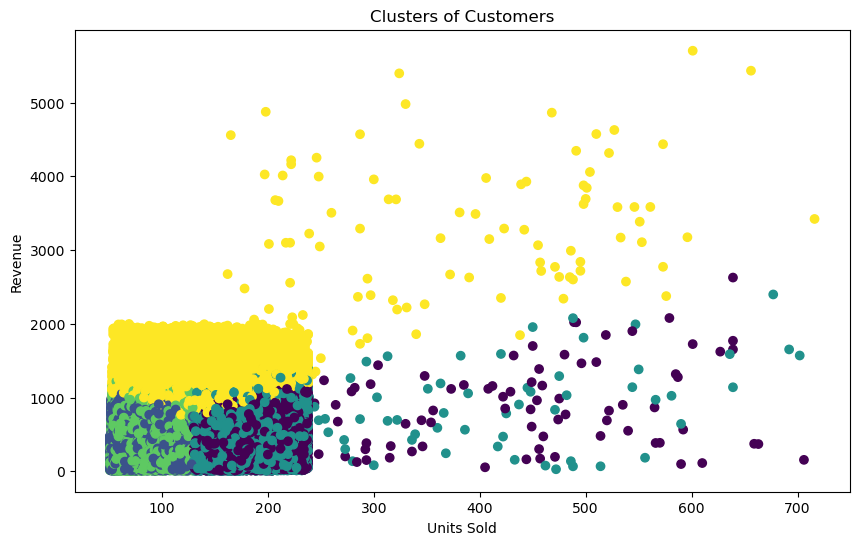

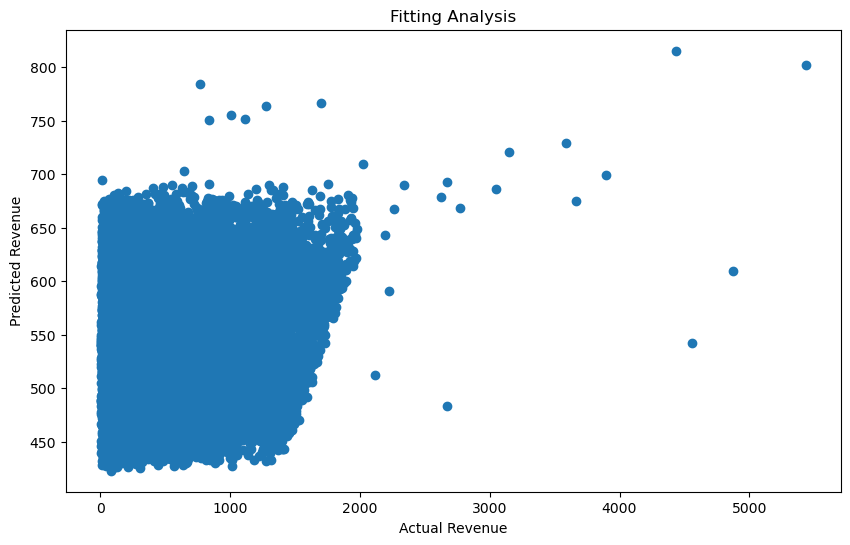

          Units_Sold  Discount_Applied        Revenue         Clicks  \
count  100000.000000     100000.000000  100000.000000  100000.000000   
mean      128.328580          0.149871     553.110811      24.539170   
std        49.679873          0.086692     428.366294      14.412477   
min        51.000000          0.000000       7.650000       0.000000   
25%        84.000000          0.070000     221.260000      12.000000   
50%       127.000000          0.150000     428.155000      25.000000   
75%       166.000000          0.220000     805.865000      37.000000   
max       716.000000          0.300000    5704.180000      49.000000   

         Impressions  Conversion_Rate         Ad_CTR         Ad_CPC  \
count  100000.000000    100000.000000  100000.000000  100000.000000   
mean      254.539060         0.198138       0.104988       1.051250   
std       141.466606         0.361187       0.054806       0.549252   
min        10.000000         0.000000       0.010000       0.100000

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Load the dataset
data = pd.read_csv('Downloads/synthetic_ecommerce_data.csv')

# Data Preprocessing
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Relational Graph
def relational_graph(x, y):
    """
    Create a relational graph between two variables.
    
    Parameters:
    x (str): The name of the x-axis variable.
    y (str): The name of the y-axis variable.
    """
    plt.figure(figsize=(10,6))
    plt.scatter(data[x], data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Relationship between {x} and {y}')
    plt.show()

relational_graph('Units_Sold', 'Revenue')

# Categorical Graph
def categorical_graph(x, hue):
    """
    Create a categorical graph between two variables.
    
    Parameters:
    x (str): The name of the x-axis variable.
    hue (str): The name of the hue variable.
    """
    plt.figure(figsize=(10,6))
    sns.countplot(x=x, hue=hue, data=data)
    plt.title(f'Distribution of {x} by {hue}')
    plt.show()

categorical_graph('Category', 'Region')

# Statistical Graph
def statistical_graph(x):
    """
    Create a statistical graph for a variable.
    
    Parameters:
    x (str): The name of the variable.
    """
    plt.figure(figsize=(10,6))
    plt.hist(data[x], bins=50)
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {x}')
    plt.show()

statistical_graph('Revenue')

# Clustering Analysis
def clustering_analysis(n_clusters):
    """
    Perform clustering analysis on the data.
    
    Parameters:
    n_clusters (int): The number of clusters.
    """
    cluster_data = data[['Units_Sold', 'Revenue', 'Discount_Applied']]
    scaler = StandardScaler()
    cluster_data_scaled = scaler.fit_transform(cluster_data)
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
    kmeans.fit(cluster_data_scaled)
    data['Cluster'] = kmeans.labels_
    plt.figure(figsize=(10,6))
    plt.scatter(data['Units_Sold'], data['Revenue'], c=data['Cluster'])
    plt.xlabel('Units Sold')
    plt.ylabel('Revenue')
    plt.title('Clusters of Customers')
    plt.show()

clustering_analysis(5)

# Fitting Analysis
def fitting_analysis():
    """
    Perform fitting analysis on the data.
    """
    X = data[['Units_Sold', 'Discount_Applied', 'Clicks', 'Impressions']]
    y = data['Revenue']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Revenue')
    plt.ylabel('Predicted Revenue')
    plt.title('Fitting Analysis')
    plt.show()

fitting_analysis()

# Statistical Depth
def statistical_depth():
    """
    Calculate statistical depth metrics.
    """
    print(data.describe())
    print(data.select_dtypes(include=['int64', 'float64']).corr())

statistical_depth()

# Clustering Prediction
def clustering_prediction():
    """
    Make clustering predictions.
    """
    cluster_data = data[['Units_Sold', 'Revenue', 'Discount_Applied']]
    scaler = StandardScaler()
    cluster_data_scaled = scaler.fit_transform(cluster_data)
    kmeans = KMeans(n_clusters=5, n_init='auto')
    kmeans.fit(cluster_data_scaled)
    predicted_clusters = kmeans.predict(cluster_data_scaled)
    plt.figure(figsize=(10,6))
    plt.scatter(data['Units_Sold'], data['Revenue'], c=predicted_clusters)
    plt.xlabel('Units Sold')
    plt.ylabel('Revenue')
    plt.title('Clustering Prediction')
    plt